In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [629]:
# Read the csvs
df = pd.read_csv("dataset/train.csv")
testdf = pd.read_csv("dataset/test.csv")
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [630]:
# get details about the datasets
def print_shapes():
    print("Training data shape : {}".format(df.shape))
    print("Testing data shape : {}".format(testdf.shape))

print_shapes()

Training data shape : (1460, 81)
Testing data shape : (1459, 80)


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [632]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [633]:
# get all the cols
cols = df.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [634]:
# get all the cols where entries are not full
# output format ex: {Missing col : missing entries}

incomplete_cols={col_entry:df['Id'].count()-df[col_entry].count() for col_entry in cols if df[col_entry].count()!= df['Id'].count()}
incomplete_cols= sorted(incomplete_cols.items(), key= lambda x:x[1], reverse= True)
incomplete_cols

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

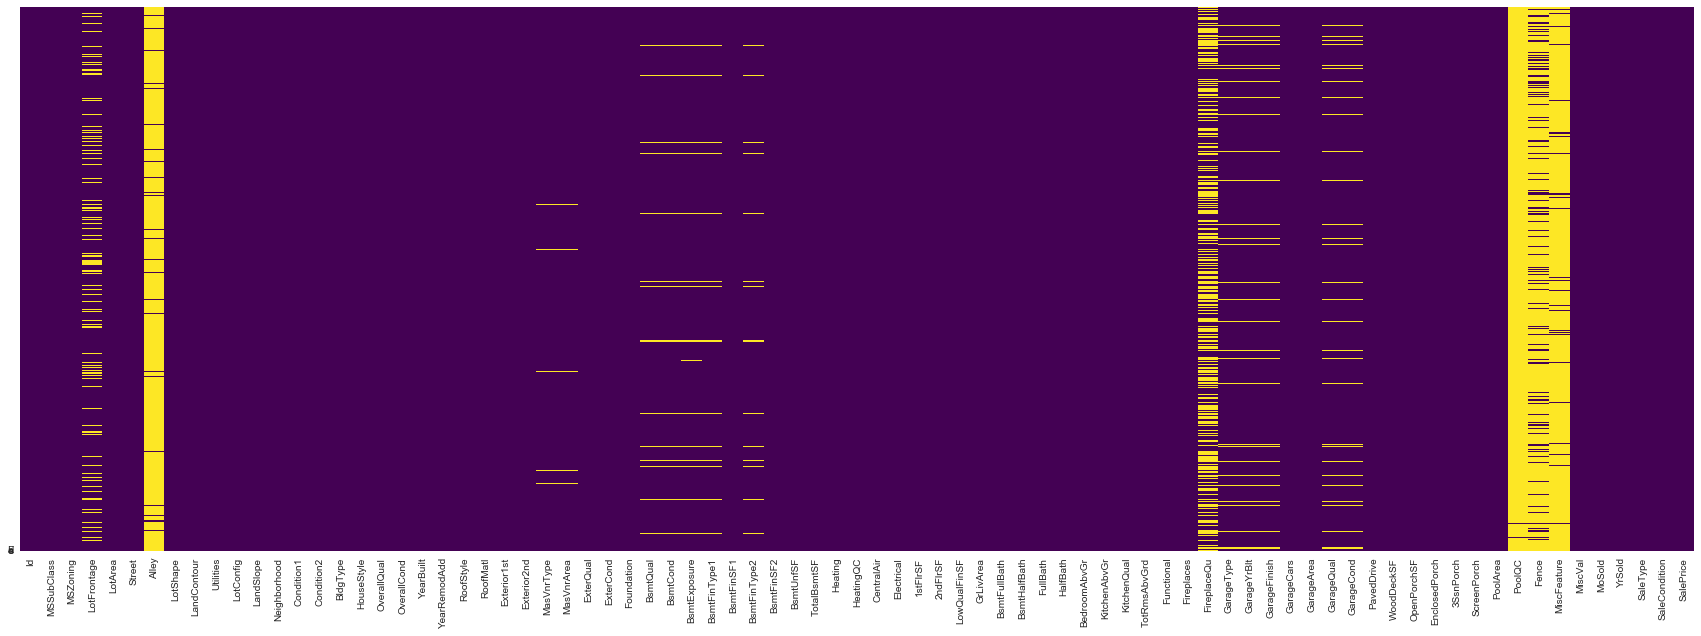

In [635]:
# plot a heatmap to indicate null values
# yellow indicates null values in that column
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels = "False",cbar=False,cmap='viridis')

# Handling the Training Dataset

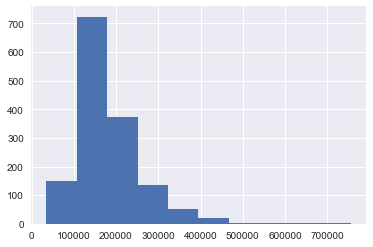

In [636]:
# sale price for houses
df['SalePrice'].hist()

In [637]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [638]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [639]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [640]:
incomplete_cols

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

In [641]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

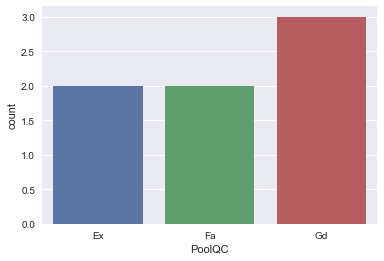

In [642]:
sns.countplot(data=df,x='PoolQC')

In [643]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values

concatDFs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],keys=['Train','Test'],axis=1)
naDfs = pd.DataFrame(concatDFs)
naDfs[naDfs.sum(axis=1)>0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [644]:
# drop those values where many values are missing for both test and train
# threshold: 600, i.e if the values are more than 600, then drop those cols.

df.drop(['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1 ,inplace=True)
testdf.drop(['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1,inplace=True)

In [645]:
# check the df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [646]:
# check the test df
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [647]:
# find the correlation between price and each other col 
correlationSP = df.corr()['SalePrice'].sort_values(ascending = False)
correlationSP

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [648]:
# get features to be deleted - features where correlation is under 0.3
delete_features = correlationSP[correlationSP<0.3]
delete_features = (list(delete_features.index)) 
delete_features

['HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [649]:
# drop both, train and test
df.drop(delete_features,axis=1, inplace=True)
testdf.drop(delete_features,axis=1,inplace=True)

In [650]:
# check for the dropped dataframes in both
print_shapes()

Training data shape : (1460, 57)
Testing data shape : (1459, 56)


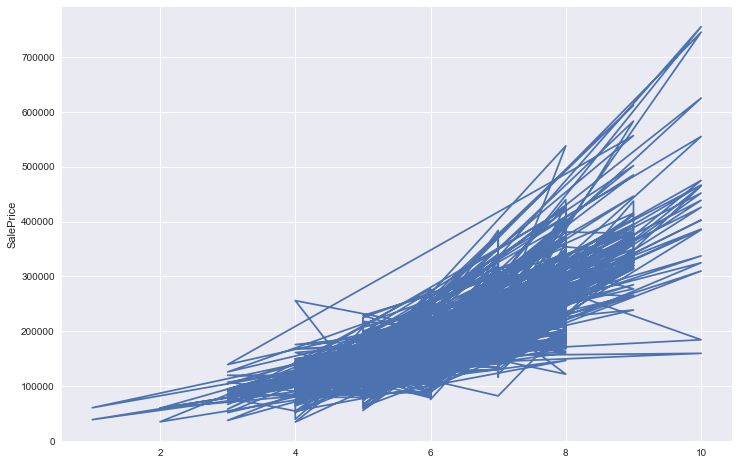

In [651]:
# fig of overallQual vs saleprice
fig,axes = plt.subplots(figsize = (12,8))
axes.plot(df['OverallQual'], df['SalePrice'])
axes.set_ylabel("OverallQual")
axes.set_ylabel("SalePrice")

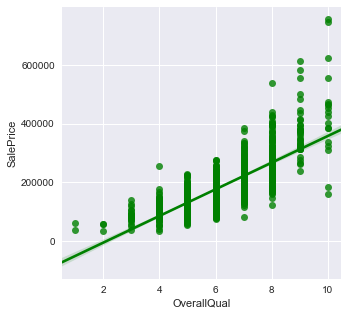

In [652]:
# Plot a regression line for overallQual vs salesprice
fig,axes = plt.subplots(figsize = (5,5))
sns.regplot(data=df, x='OverallQual',y='SalePrice',color='green')

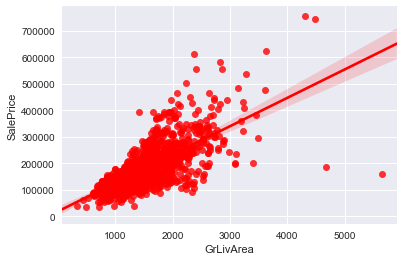

In [653]:
sns.regplot(data=df, x='GrLivArea',y='SalePrice',color='red')

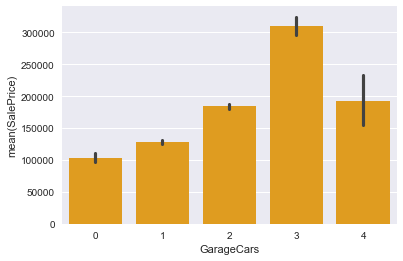

In [654]:
sns.barplot(data=df, x='GarageCars',y='SalePrice',color='orange')

In [655]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtQual,37,44.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0


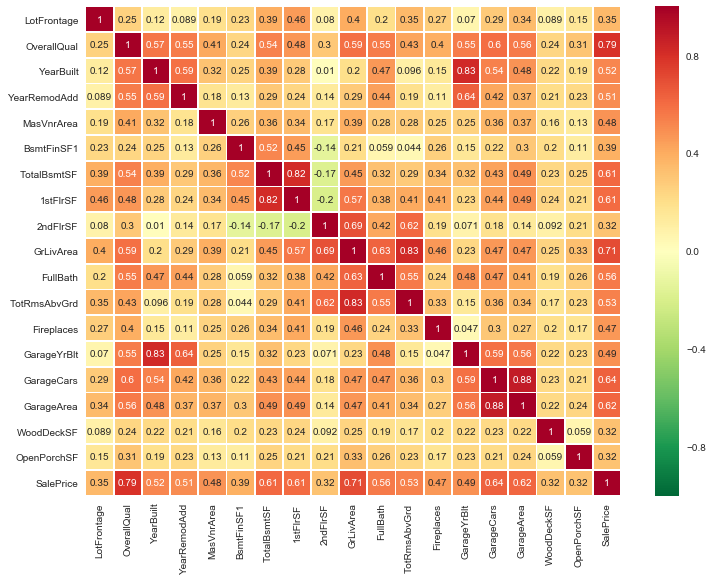

In [656]:
# look at the most missing values 
# one of which : LotFrontage	259	227.0
# now look at the most correlated values to LotFrontage
# to make it happen

# Load the datset of correlations between
corrmat = df.corr()
corrmat

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, cmap='RdYlGn_r', linewidths=0.8, annot=True)

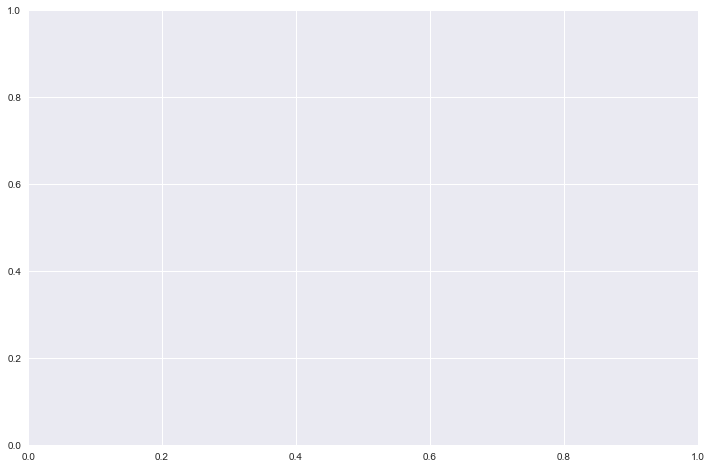

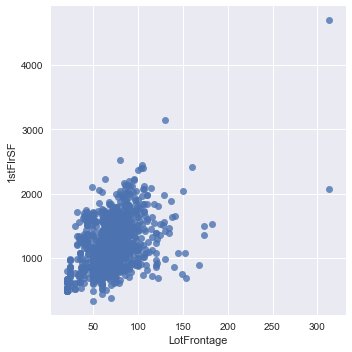

In [657]:
# 'LotFrontage' seems to have high correlation with '1stFlrSF'
# Consider boxplotting them to fill voids

fig,axes = plt.subplots(figsize=(12,8))
sns.lmplot(x='LotFrontage',y='1stFlrSF',data=df,fit_reg=False)

In [658]:
# fill empty values by building a regression model to predict the missing values
# features - pick 3 highest correlating values to LotFrontage to build a predictive model
# I prefer to choose - 'totalBsmtSf', '1stFloor', 'GRLivingArea'
to_clean_df= df[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']]
 
# only accept non empty cells
cleaned_df = to_clean_df[to_clean_df['LotFrontage'].notnull()]
cleaned_df.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
0,856,856,1710,65.0
1,1262,1262,1262,80.0
2,920,920,1786,68.0
3,756,961,1717,60.0
4,1145,1145,2198,84.0


In [659]:
# prepare basic variables to apply a ML model.
X = cleaned_df[['TotalBsmtSF','1stFlrSF','GrLivArea']]
y = cleaned_df[['LotFrontage']]

In [660]:
X.shape

(1201, 3)

In [661]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.ensemble import RandomForestRegressor
global inner_model
inner_model = RandomForestRegressor(n_estimators=60)
inner_model.fit(X_train,y_train)


C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [662]:
predictions = inner_model.predict(X_test)
predictions 

array([  69.41666667,   52.64694444,   84.51666667,   75.28333333,
         98.55      ,   73.8       ,   96.98861111,   63.69861111,
         85.78333333,   68.45406416,   67.03333333,   46.34333333,
         72.1       ,   74.86666667,   55.17222222,   53.8       ,
         68.83333333,   47.6       ,   80.11666667,   95.3       ,
         66.645     ,   82.16666667,   97.48333333,   44.88055556,
         80.8       ,   71.80833333,   93.05      ,   85.85      ,
         69.4       ,   68.48472222,  102.        ,   65.31666667,
         65.01055556,   67.46666667,   73.53333333,   75.86666667,
         64.1       ,   78.9       ,   48.33333333,   86.61666667,
         69.325     ,   86.81666667,   78.00582612,   80.16666667,
         95.29583333,  116.2       ,   78.92      ,   74.71666667,
         83.21666667,   70.41111111,   67.08416667,   64.68333333,
         91.78333333,   62.0591336 ,   94.48333333,   60.75      ,
         89.58333333,   81.63333333,   68.45406416,   99.08333

In [663]:
y_test

,LotFrontage
292,60.0
1238,63.0
280,82.0
82,78.0
440,105.0
355,105.0
53,68.0
1067,80.0
1027,71.0
722,70.0


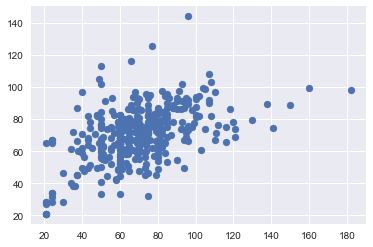

In [664]:
# roughly check the accuracy of prediction by scatter plotting
plt.scatter(y_test,predictions)

In [665]:
# check the accuracy in real
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.3952091403
MSE: 388.305975425
RMSE: 19.7054808474


In [666]:
# inner regression model seems to be fairly(supposedly 85%) accurate.
# get the empty values in df to be predicted by the model

fill_Df_train = df[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']].copy()
fill_Df_train = fill_Df_train[fill_Df_train['LotFrontage'].isnull()]
fill_Df_train.count()

TotalBsmtSF    259
1stFlrSF       259
GrLivArea      259
LotFrontage      0
dtype: int64

In [667]:
fill_Df_train['LotFrontage']=inner_model.predict(fill_Df_train[['TotalBsmtSF','1stFlrSF','GrLivArea']])
fill_Df_train['LotFrontage']

7        75.450000
12       67.318578
14       75.708333
16       46.766667
24       66.516111
31       49.716667
42       62.317949
43       65.416111
50       57.550000
64       79.000000
66       89.516667
76       58.316667
84       60.216667
95       71.950000
100      62.283333
104      71.116667
111      69.433333
113      81.755556
116      81.633333
120      72.961111
126      76.191667
131      83.400000
133      56.316667
136      67.633333
147     119.783333
149      62.879828
152      79.916667
153      73.600000
160      62.183333
166     103.545833
           ...    
1300     83.566667
1301     54.327778
1309     68.533333
1312    126.750000
1318     83.833333
1321     60.450000
1342     66.200000
1346     89.350000
1348     77.560278
1354     76.716667
1356     70.463622
1357     69.450000
1358     61.516667
1362     78.766667
1365     69.333333
1368     45.316667
1373     87.333333
1381     89.183333
1383     85.975000
1396     74.383333
1407     79.066667
1417     78.

In [668]:
# filled values for LotFrontage
fill_Df_train

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
7,1107,1107,2090,75.450000
12,912,912,912,67.318578
14,1253,1253,1253,75.708333
16,1004,1004,1004,46.766667
24,1060,1060,1060,66.516111
31,1228,1228,1228,49.716667
42,840,884,884,62.317949
43,938,938,938,65.416111
50,794,794,1470,57.550000
64,1057,1057,2034,79.000000


In [669]:
# Multiple access confusion
# refer here : https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

df[df['LotFrontage'].isnull()]['LotFrontage']=fill_Df_train['LotFrontage']


C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [670]:
# Using the .loc approach to replace values
df.loc[df['LotFrontage'].isnull(),'LotFrontage']=fill_Df_train['LotFrontage']

In [671]:
# check for any null entries in the 'LotFrontage' column of df
df['LotFrontage'].isnull().sum()

0

In [672]:
# View the df
df['LotFrontage']

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        75.450000
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       67.318578
13       91.000000
14       75.708333
15       51.000000
16       46.766667
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       66.516111
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
           ...    
1430     60.000000
1431     56.552778
1432     60.000000
1433     93.000000
1434     80.000000
1435     80.000000
1436     60.000000
1437     96.000000
1438     90.000000
1439     80.000000
1440     79.000000
1441     45.316667
1442     85.000000
1443     58.316667
1444     63.000000
1445     70.000000
1446     72.650000
1447     80.000000
1448     70.000000
1449     21.000000
1450     60.000000
1451     78.

In [673]:
# Likewise fill the test df
fill_Df_test = testdf[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']]
fill_Df_test = fill_Df_test[fill_Df_test['LotFrontage'].isnull()]
fill_Df_test.count()

TotalBsmtSF    227
1stFlrSF       227
GrLivArea      227
LotFrontage      0
dtype: int64

In [674]:
fill_Df_test['LotFrontage']=inner_model.predict(fill_Df_test[['TotalBsmtSF','1stFlrSF','GrLivArea']])
fill_Df_test['LotFrontage']

6        70.850000
40       64.350000
41       29.500000
45       90.639722
47       67.533333
52       87.116667
59       52.146944
75       59.566667
82       88.383333
98       70.000000
103      84.271111
105      68.094444
107      83.666667
113      58.300000
119      74.683333
124      45.316667
132      48.424337
146     101.550000
152      74.316667
167      91.300000
174      64.933333
177      83.950000
179      73.800000
182      76.383333
183      68.033333
184      86.283333
187      75.166667
188      73.158056
199      80.300000
229      60.233333
           ...    
1224    105.350000
1240     28.441667
1243     73.511111
1244     69.455556
1246     75.188889
1247     63.887500
1248     67.318578
1249     63.676111
1254     67.450000
1255     29.500000
1264     77.433333
1267     80.377778
1277     72.183333
1278     78.416667
1281     76.333333
1304     91.366667
1347     77.183333
1350     90.055556
1351     66.031111
1352    110.616667
1354     68.455051
1355     79.

In [675]:
# filled values for LotFrontage
fill_Df_test

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
6,1168.0,1187,1187,70.850000
40,756.0,756,1512,64.350000
41,530.0,530,1080,29.500000
45,1829.0,1829,1829,90.639722
47,1224.0,1287,1891,67.533333
52,533.0,1131,1775,87.116667
59,1143.0,1143,1143,52.146944
75,1008.0,1060,1245,59.566667
82,1108.0,1160,2068,88.383333
98,707.0,942,1884,70.000000


In [676]:
# Using the .loc approach to replace values
testdf.loc[testdf['LotFrontage'].isnull(),'LotFrontage']=fill_Df_test['LotFrontage']

In [677]:
# No null values for LotFrontage
testdf['LotFrontage'].isnull().sum()

0

In [678]:
# View the test values
testdf['LotFrontage']

0        80.00
1        81.00
2        74.00
3        78.00
4        43.00
5        75.00
6        70.85
7        63.00
8        85.00
9        70.00
10       26.00
11       21.00
12       21.00
13       24.00
14       24.00
15      102.00
16       94.00
17       90.00
18       79.00
19      110.00
20      105.00
21       41.00
22      100.00
23       43.00
24       67.00
25       63.00
26       60.00
27       73.00
28       92.00
29       84.00
         ...  
1429     50.00
1430     75.00
1431     69.00
1432     50.00
1433     60.00
1434     41.00
1435     44.00
1436     69.00
1437     65.00
1438     70.00
1439    140.00
1440     85.85
1441     79.40
1442     95.00
1443     88.00
1444    125.00
1445     78.00
1446     41.00
1447     58.00
1448     81.95
1449     21.00
1450     21.00
1451     80.00
1452     21.00
1453     21.00
1454     21.00
1455     21.00
1456    160.00
1457     62.00
1458     74.00
Name: LotFrontage, dtype: float64

In [679]:
testdf['LotFrontage'].shape

(1459,)

In [680]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values
# Notice that 'LotFrontage' is gone!

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtQual,37,44.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0


In [681]:
naDfs.index.values 

array(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'TotalBsmtSF', 'Utilities'], dtype=object)

In [682]:
# Extracts only the numeric cols
num_cols = df._get_numeric_data().columns
num_cols

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [683]:
# fill all NaN's in training df 
for element in naDfs.index.values:  
        if df[element].isnull().sum() > 0:
            if element not in num_cols:  
                df[element].fillna(df[element].mode()[0], inplace=True)
            else:
                df[element].fillna(df[element].mean(), inplace=True)

In [684]:
# Training Df is filled
df.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

In [685]:
# fill all NaN's in testing df 
for element in naDfs.index.values:  
        if testdf[element].isnull().sum() > 0:
            if element not in num_cols:  
                testdf[element].fillna(testdf[element].mode()[0], inplace=True)
            else:
                testdf[element].fillna(df[element].mean(), inplace=True)

In [686]:
# Testing Df is filled
testdf.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

In [687]:
# check if there are any empty values left so far
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values
# Notice that 'LotFrontage' is gone!

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train


In [688]:
# seems like there are no empty values 

In [689]:
# The non numeric cols need to preprocessed before fitting.
# as mentioned here : https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float

In [690]:
# trying for sample
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['MSZoning'])
le.classes_

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

In [691]:
le.transform(df['MSZoning'])

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [692]:
arr = le.transform(df['MSZoning'])
len(arr)

1460

In [693]:
# get and apply label encoder for categorical cols in the training dataset
for col in df.columns:
    if col not in num_cols:
        le.fit(df[col])
        df[col] = le.transform(df[col])
df        

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,3,65.000000,1,3,3,0,4,0,5,2,...,2,548,4,4,2,0,61,8,4,208500
1,3,80.000000,1,3,3,0,2,0,24,1,...,2,460,4,4,2,298,0,8,4,181500
2,3,68.000000,1,0,3,0,4,0,5,2,...,2,608,4,4,2,0,42,8,4,223500
3,3,60.000000,1,0,3,0,0,0,6,2,...,3,642,4,4,2,0,35,8,0,140000
4,3,84.000000,1,0,3,0,2,0,15,2,...,3,836,4,4,2,192,84,8,4,250000
5,3,85.000000,1,0,3,0,4,0,11,2,...,2,480,4,4,2,40,30,8,4,143000
6,3,75.000000,1,3,3,0,4,0,21,2,...,2,636,4,4,2,255,57,8,4,307000
7,3,75.450000,1,0,3,0,0,0,14,4,...,2,484,4,4,2,235,204,8,4,200000
8,4,51.000000,1,3,3,0,4,0,17,0,...,2,468,1,4,2,90,0,8,0,129900
9,3,50.000000,1,3,3,0,0,0,3,0,...,1,205,2,4,2,0,4,8,4,118000


In [694]:
# get the numerical cols now after updating label encoders
df._get_numeric_data().columns.shape

(57,)

In [695]:
# Performing the same for testing dataset.
for col in testdf.columns:
    if col not in num_cols:
        le.fit(testdf[col])
        testdf[col] = le.transform(testdf[col])
testdf        

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,2,80.00,1,3,3,0,4,0,12,1,...,2,1.0,730.0,3,4,2,140,0,8,4
1,3,81.00,1,0,3,0,0,0,12,2,...,2,1.0,312.0,3,4,2,393,36,8,4
2,3,74.00,1,0,3,0,4,0,8,2,...,0,2.0,482.0,3,4,2,212,34,8,4
3,3,78.00,1,0,3,0,4,0,8,2,...,0,2.0,470.0,3,4,2,360,36,8,4
4,3,43.00,1,0,1,0,4,0,22,2,...,1,2.0,506.0,3,4,2,0,82,8,4
5,3,75.00,1,0,3,0,0,0,8,2,...,0,2.0,440.0,3,4,2,157,84,8,4
6,3,70.85,1,0,3,0,4,0,8,2,...,0,2.0,420.0,3,4,2,483,21,8,4
7,3,63.00,1,0,3,0,4,0,8,2,...,0,2.0,393.0,3,4,2,0,75,8,4
8,3,85.00,1,3,3,0,4,0,8,2,...,2,2.0,506.0,3,4,2,192,0,8,4
9,3,70.00,1,3,3,0,0,0,12,2,...,0,2.0,525.0,3,4,2,240,0,8,4


In [696]:
# Performing Testing and Training for the Dataset

In [697]:
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [698]:
# Everything is now converted to numerical cols

# Trying Different Regression Models before Finalizing

Random Forest Regressor

In [699]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=160)
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [700]:
predictions_random_forest = random_forest_model.predict(X_test)
predictions_random_forest

array([ 138648.4375 ,  315828.2625 ,  117374.125  ,  168984.6875 ,
        315396.4    ,   84796.875  ,  202075.91875,  151464.65625,
         83364.375  ,  117306.65625,  156189.34375,  115233.4375 ,
        105856.5625 ,  206356.85   ,  180588.9375 ,  126771.71875,
        196049.96875,  137042.65625,  118555.99375,  203339.31875,
        169104.6875 ,  224817.38125,  175879.35   ,  124647.8125 ,
        193430.7875 ,  170504.125  ,  186194.15625,  102875.3125 ,
        181526.95   ,  197059.90625,  126902.9    ,  246381.36875,
        181752.84375,  111482.8125 ,  251582.45625,  146386.5625 ,
        139771.125  ,  204309.60625,  300679.45   ,  105046.25   ,
        125917.075  ,  241882.4375 ,  118557.5    ,  375522.94375,
        133786.0625 ,  143103.1    ,  115872.8125 ,  129126.875  ,
        387849.21875,  137692.89375,  117762.5    ,  203258.4375 ,
        125560.675  ,  345087.24375,  141239.58125,  244392.90625,
        197960.8    ,  147150.7375 ,  145798.39375,  111470.62

In [701]:
# predictions are almost the same  
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
1031    197000
1262    161500
1013     85000
1311    203000
566     325000
610     313000
1278    237000
1263    180500
816     137000
438      90350
940     150900
96      214000
560     121500
1182    745000
471     190000
1004    181000
410      60000
963     239000
582     118500
156     109500
594     110000
617     105500
447     199900
1205    271900
861     131500
1010    135000
390     119000
1409    215000
847     133500
1284    169000
Name: SalePrice, dtype: int64

In [702]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_random_forest))
print('MSE:', metrics.mean_squared_error(y_test, predictions_random_forest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_random_forest)))

MAE: 18031.3540456
MSE: 906319333.861
RMSE: 30105.1379977


Gradient Boosting Regressor

In [703]:
from sklearn.ensemble import GradientBoostingRegressor

In [727]:
gradient_boost_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber')
gradient_boost_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [728]:
gb_predicts = gradient_boost_model.predict(X_test)
gb_predicts

array([ 144804.31618852,  325096.05157071,   99402.54501286,
        162954.05486009,  321701.57384628,   74883.59583739,
        224504.17639079,  152293.16167731,   73730.89492079,
        124133.27149781,  134190.25239615,  116399.70069988,
        109900.45903971,  198544.64053289,  167941.62031173,
        127905.47857298,  197155.07749439,  135281.90928029,
        125655.49783807,  212625.98640214,  161716.93372831,
        225717.61693505,  173057.67799263,  130226.14617419,
        204820.94582327,  171356.69006442,  197283.90245132,
        103813.92007998,  183897.73687989,  217841.21393742,
        129611.28340741,  251339.8253043 ,  246183.34796692,
        111625.79440239,  257436.5074925 ,  143881.39477402,
        132134.71166267,  205063.92520792,  287327.66914734,
        107295.00316099,  126940.78736736,  255382.22895871,
        124283.6382139 ,  393083.81001072,  131270.15655195,
        151302.57338367,  117998.44266505,  124205.33254584,
        417763.35798722,

In [729]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
1031    197000
1262    161500
1013     85000
1311    203000
566     325000
610     313000
1278    237000
1263    180500
816     137000
438      90350
940     150900
96      214000
560     121500
1182    745000
471     190000
1004    181000
410      60000
963     239000
582     118500
156     109500
594     110000
617     105500
447     199900
1205    271900
861     131500
1010    135000
390     119000
1409    215000
847     133500
1284    169000
Name: SalePrice, dtype: int64

In [730]:
print('MAE:', metrics.mean_absolute_error(y_test, gb_predicts))
print('MSE:', metrics.mean_squared_error(y_test, gb_predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_predicts)))

MAE: 16868.2930896
MSE: 856551649.538
RMSE: 29266.9036548


Seems like Gradient Boost is better. I'd go with it.

In [708]:
gradient_boost_model = GradientBoostingRegressor(alpha=0.92,learning_rate=0.1,n_estimators=3000)
gradient_boost_model.fit(df.drop(['SalePrice'],axis=1),df['SalePrice'])

GradientBoostingRegressor(alpha=0.92, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [709]:
g_predictions = gradient_boost_model.predict(testdf)
g_predictions

array([ 118918.65532587,  163138.52444149,  182452.18092304, ...,
        173552.30635037,  113727.24466834,  236019.41603938])

In [710]:
# since Kaggle ranks based on RMSE, Random forests is a better option
random_forest_model = RandomForestRegressor(n_estimators=160)
random_forest_model.fit(df.drop(['SalePrice'],axis=1),df['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [711]:
random_forest_model_preds = random_forest_model.predict(testdf)
random_forest_model_preds

array([ 122763.58125,  155113.4375 ,  178895.375  , ...,  143823.875  ,
        108101.25   ,  222444.6    ])

In [712]:
output_dict = {}
initial_value=1461
for number in random_forest_model_preds:
    output_dict[initial_value]=number
    initial_value += 1
output_dict    

{1461: 122763.58125,
 1462: 155113.4375,
 1463: 178895.375,
 1464: 184357.9375,
 1465: 203414.42499999999,
 1466: 184505.20000000001,
 1467: 167224.97500000001,
 1468: 176897.78125,
 1469: 183251.125,
 1470: 119085.8,
 1471: 199381.27499999999,
 1472: 95341.875,
 1473: 100586.71875,
 1474: 154581.875,
 1475: 141844.34375,
 1476: 387814.91875000001,
 1477: 246787.5625,
 1478: 309351.41249999998,
 1479: 260280.78750000001,
 1480: 449448.125,
 1481: 307304.29375000001,
 1482: 207759.65625,
 1483: 176278.95624999999,
 1484: 175446.85625000001,
 1485: 171108.10625000001,
 1486: 200922.48125000001,
 1487: 318166.06874999998,
 1488: 246501.76874999999,
 1489: 214722.34375,
 1490: 199099.51250000001,
 1491: 191666.84375,
 1492: 93560.431249999994,
 1493: 173600.14374999999,
 1494: 289294.97499999998,
 1495: 296292.83750000002,
 1496: 229934.14999999999,
 1497: 196682.15625,
 1498: 154474.81875000001,
 1499: 152236.93124999999,
 1500: 153059.08124999999,
 1501: 173638.125,
 1502: 161961.6124999

In [713]:
outputdf = pd.DataFrame(output_dict,index=[0]).T
outputdf

,0
1461,122763.58125
1462,155113.43750
1463,178895.37500
1464,184357.93750
1465,203414.42500
1466,184505.20000
1467,167224.97500
1468,176897.78125
1469,183251.12500
1470,119085.80000


In [714]:
outputdf.to_csv("output_kaggle.csv",index_label=['Id','SalePrice'],encoding='utf-8')